In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust

# Haberman's Survival Data Set   

### Objective

To predict whether the patient will survive after 5 years based on the patient's age, year of surgery and number of positive lymph nodes.

In [2]:
haberman = pd.read_csv("haberman.csv")
haberman.shape

(306, 4)

In [3]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [133]:
haberman.status.unique()

array([1, 2], dtype=int64)

In [51]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


## Observations 

1. There are totally 306 observations
2. There are totally 3 features: Age of the patient, Year of Treatment and Number of positive lymph nodes
3. There are no missing values. 
4. The class label is an integer with values 1 and 2, 1 indicating Patients Survived more than 5 years after the year of          treatment and 2 indicating patients survived less than 5 years after the year of treatment.
5. The class label must be changed to a categorical variable.

# Making the status as Categorical Variable

In [4]:
haberman["status"] = haberman["status"].map({1: "Survived after 5yrs", 2: "Not Survived after 5yrs"})
haberman.tail()

,age,year,nodes,status
301,75,62,1,Survived after 5yrs
302,76,67,0,Survived after 5yrs
303,77,65,3,Survived after 5yrs
304,78,65,1,Not Survived after 5yrs
305,83,58,2,Not Survived after 5yrs


In [54]:
haberman["status"] = haberman["status"].astype("category")
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


# Balanced or Imbalanced Data-set ?

In [55]:
haberman["status"].value_counts()

Survived after 5 years        225
Not Survived after 5 years     81
Name: status, dtype: int64

In [60]:
haberman["status"].value_counts(normalize = True)

Survived after 5 years        0.735294
Not Survived after 5 years    0.264706
Name: status, dtype: float64

## Observation 

The Class label is imbalanced with 73% of patient's status as Survived more than 5 years

# Min, Max, Mean, Median and Quantiles 

In [56]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


## Observations: 

1. The age of the patients vary from 30 to 83 and the median is 52
2. The Surgery Year is between 1958 and 1969
3. The mean of all the patient's positive lymph nodes is 4 which is significanty greater than the median which is 1
4. Although, the positive lymph nodes of the patients vary between 0 and 52, 75 % of the patients have positive lymph nodes     between 0 and 4, half of the patients have positive lymph nodes less than 2 and 25% of the patients have no positive lymph nodes at all.
5. Observation 3 and 4 indicate there are extreme values ie. outliers in our data set. Hence median and Median Absolute Deviation will be the most useful statistic to analyse our data than mean and standard deviation. 

# Max and Min Status-wise

In [31]:
g = haberman.groupby("status")
g.agg(['max','min'])

age     year     nodes    
                        max min  max min   max min
status                                            
Not Survived after 5yrs  83  34   69  58    52   0
Survived after 5yrs      77  30   69  58    46   0

## Observations 

1. Patients with age less than 34 have survived.
2. Patients with age greater than 77 have not survived. 
3. Patients with nodes greater than 46 have not survived.

# Median Absolute Deviation

In [39]:
nodes_of_survived = g.get_group("Survived after 5yrs")["nodes"]
nodes_of_not_survived = g.get_group("Not Survived after 5yrs")["nodes"]

survived_median = np.median(nodes_of_survived)
not_survived_median = np.median(nodes_of_not_survived)
survived_mad = robust.mad(nodes_of_survived, c = 1)
not_survived_mad = robust.mad(nodes_of_not_survived, c = 1)

print("Median of survived patients = {}".format(survived_median))
print("Median of not survived patients = {}".format(not_survived_median))
print("\nMedian Absolute Deviation of survived patients = {}".format(survived_mad))
print("Median Absolute Deviation of not survived patients = {}".format(not_survived_mad))

Median of survived patients = 0.0
Median of not survived patients = 4.0

Median Absolute Deviation of survived patients = 0.0
Median Absolute Deviation of not survived patients = 4.0


## Observation 

1. From Median Absolute Deviation (MAD), we can infer, most of the survived patients have no nodes.
2. Nodes of most of the not survived patients vary between 0 and 8.

# Percentiles 

In [37]:
survived_90 = np.percentile(nodes_of_survived,90)
not_survived_90 = np.percentile(nodes_of_not_survived,90)
print("90th percentile nodes of survived = {}".format(survived_90))
print("90th percentile nodes of not survived = {}".format(not_survived_90))

90th percentile nodes of survived = 8.0
90th percentile nodes of not survived = 20.0


## Observations 

1. 90% of the survived patients have nodes less than or equal to 8
2. 90% of the not survived patients have nodes less than or equal to 20

In [186]:
g.nodes.value_counts(normalize = True, bins = 5)

status                                 
Not Survived after 5yrs  (-0.053, 10.4]    0.716049
                         (10.4, 20.8]      0.185185
                         (20.8, 31.2]      0.074074
                         (41.6, 52.0]      0.012346
                         (31.2, 41.6]      0.012346
Survived after 5yrs      (-0.047, 9.2]     0.915556
                         (9.2, 18.4]       0.048889
                         (18.4, 27.6]      0.022222
                         (27.6, 36.8]      0.008889
                         (36.8, 46.0]      0.004444
Name: nodes, dtype: float64

## Observations 

1. 71% of the not survived patients have nodes less than 11.
2. 91% of the survived patients have nodes less than 10
3. The Survival probability of patients decrease as the nodes increase.

# Bivariate Analysis: 2 D Scatter Plot

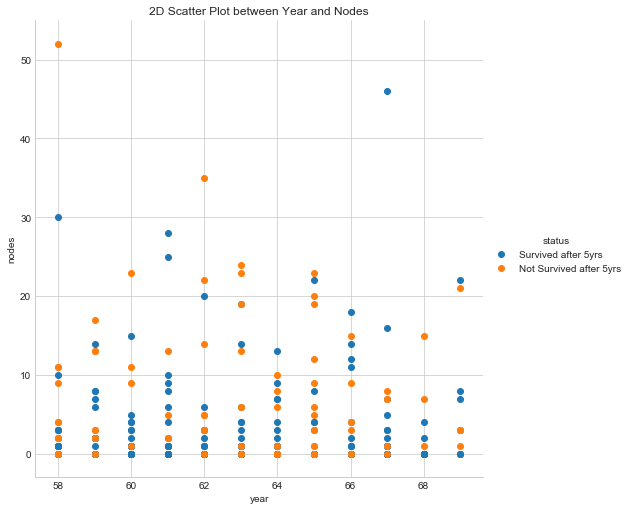

In [142]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue = "status", size = 7).map(plt.scatter, "year", "nodes").add_legend()
plt.title("2D Scatter Plot between Year and Nodes")
plt.show()

## Observations 

1. There are more number of patients with nodes less than 10, out of which patients survived after 5 years are higher.

# Bivariate analysis - Pairplot

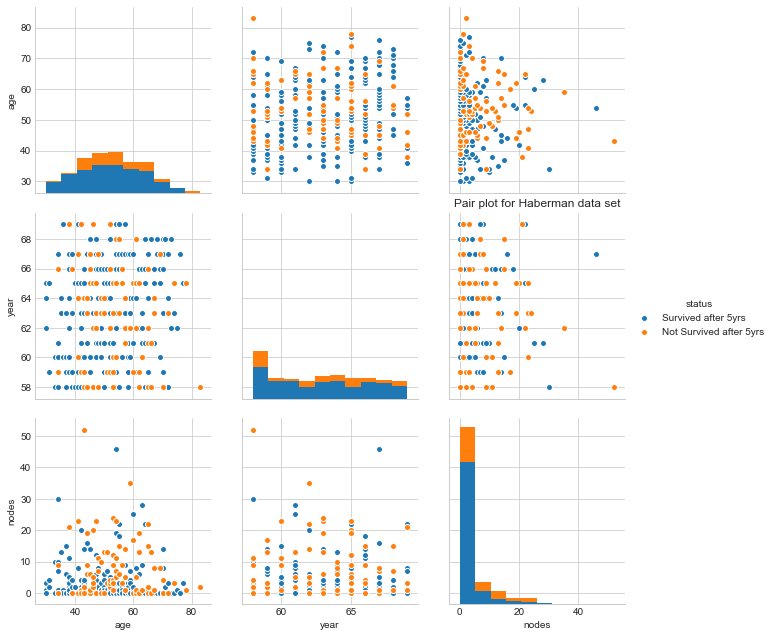

In [103]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue = "status", size = 3)
plt.show()

## Observations

1. As the data points overlap each other massively, we couldn't derive any specific seperation threshold for distinguishing the class labels.

2. But with the nodes diagonal bar graph, we can infer, more than half of the survived patients have number of nodes less than 5.

3. Hence we could infer nodes as the most useful feaure for predicting the survival of the patients.

# Univariate Analysis: Histograms

C:\Users\sozhancompi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sozhancompi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sozhancompi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sozhancompi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sozhancompi\Anaconda3\lib\site-pack

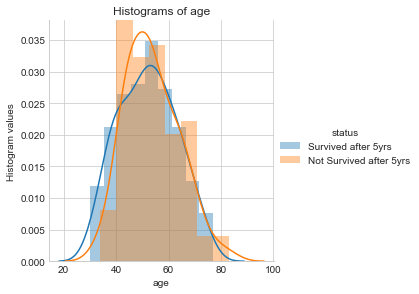

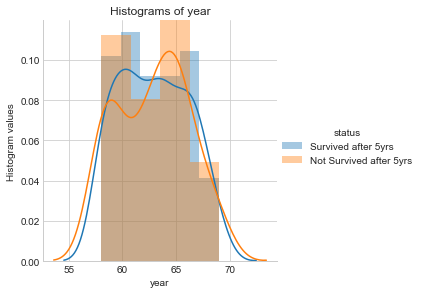

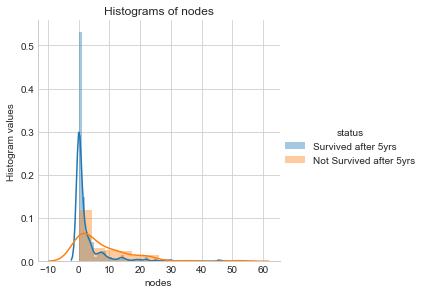

In [104]:
for feature in list(haberman.columns[:-1]):
    sns.FacetGrid(haberman, hue = "status", size = 4).map(sns.distplot, feature).add_legend()
    plt.title("Histograms of {}".format(feature))
    plt.ylabel("Histogram values")
plt.show()

## Observation 

To predict the survival, using nodes would be highly better than using age and using age is slightly better than using year.

We can infer few other minor points as below:
1. The probability of non survival is slightly higher for the age group 40 - 60.
2. The probability of survival is slightly higher for treatments done from the year 1958 to 1962.
3. The probability of not survival is slightly higher for treatments done from the year 1963 to 1966.
4. The probability of survival of patients having nodes less than 5 is drastically higher.

# Univariate Analysis: PDFs and CDFs

------------------------------PDF and CDF of Survived after 5yrs with respect to age------------------------------

Histogram values: [0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]

Bin Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

CDF: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]

------------------------------PDF and CDF of Not Survived after 5yrs with respect to age------------------------------

Histogram values: [0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]

Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]

CDF: 

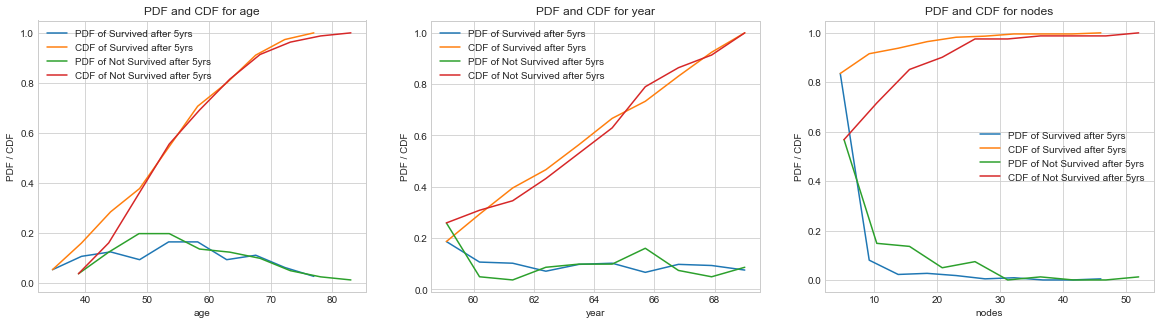

In [75]:
plt.figure(figsize=(20,5))
nodes_of_survived = haberman.nodes[haberman.status == "Survived after 5yrs"]
nodes_of_not_survived = haberman.nodes[haberman.status == "Not Survived after 5yrs"]
for idx,feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx + 1)
    
    for survival_status in list(haberman.status.unique()):
        print('-' * 30 + 'PDF and CDF of '+ survival_status + ' with respect to ' + feature + '-' * 30)
        hist, bin_edges = np.histogram(haberman[feature][haberman.status == survival_status], bins = 10, density = True )
    
        print("\nHistogram values: {}".format(hist))
        print("\nBin Edges: {}".format(bin_edges))
    
        pdf = hist / sum(hist)
        print("\nPDF: {}".format(pdf))
    
        cdf = np.cumsum(pdf)
        print("\nCDF: {}\n".format(cdf))
    
        lines = plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
        
        plt.setp(lines[0],label = "PDF of {}".format(survival_status))
        plt.setp(lines[1],label = "CDF of {}".format(survival_status))
        
    plt.title("PDF and CDF for {}".format(feature))
    plt.xlabel(feature)
    plt.ylabel("PDF / CDF")
    plt.legend()
    
plt.show()

## Observations

Age Related observations:
1. For patients with age less than 50, the surivival probability is quite higher by around 10%.
2. Around 20% of the non-survival patient's age is 50.

Year related observations:
1. There is not much significant improvement in the patient survival probability year by year.

Nodes related observations:
1. Around 81% of the patients survived more than 5 years, have number of positive lymph nodes less than 5.
2. For patients with nodes less than 26, the survival probability is higher by around 5 to 20 %, with the probability difference decreasing as the nodes increasing. 
3. For patients with nodes between 10 to 30, the non-survival probability is higher by around 5 to 10 %.

# Univariate Analysis: Box Plot 

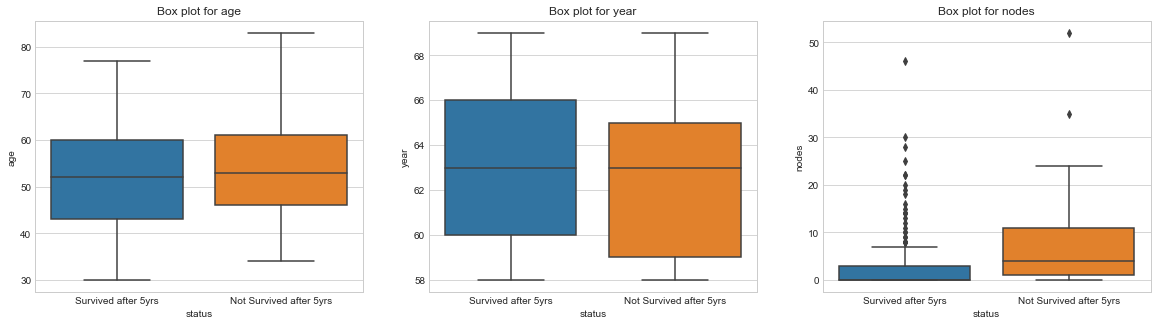

In [190]:
plt.figure(1, figsize = (20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(x = "status", y = feature, data = haberman)
    plt.title("Box plot for {}".format(feature))
plt.show()

## Observations 

1. If I categorize patients with nodes lesser than 5 have survived more than 5 years, errorneously I'm likely to classify around 48% of patients not survived as patients survived and miss out 25% of the survived patients.  

2. If I categorize patients with age lesser than 52 have survived more than 5 years, errorneously I'm likely to classify around 49% of patients not survived as survived and miss out 50% of the survived patients.

3. If I categorize patients undergone operations after the year 1963 as survived more than 5 years, errorneously I'm likely to classify around 50% of not survived as survived and miss out 50% of the survived patients.

# Univariate Analysis: Violin Plot 

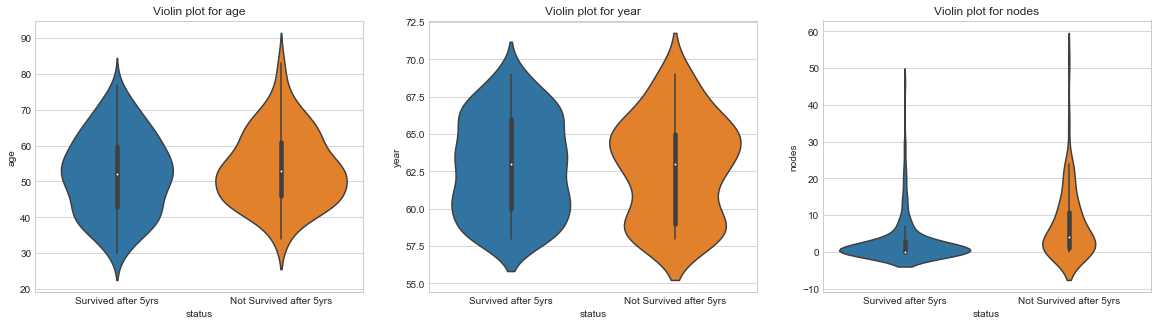

In [191]:
plt.figure(1, figsize = (20,5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx + 1)
    sns.violinplot(x = "status", y = feature, data = haberman)
    plt.title("Violin plot for {}".format(feature))
plt.show()

## Observations 

1. Most of the survivors after 5 years have number of positive lymph nodes between 0 and 5.
2. The probability of survival is most high for patients with age 53
3. The probability of non survival is most high for patients with age 50.
4. The probability of survival is most high for patients undergone operation in the year 1960.
5. The probability of non survival is most high patients undergone operation in the year 1964.
6. The probability of survival is most high for patients with no nodes.
7. The probability of non survival is most high for patients with nodes 3.

# Bivariate Analysis - Joint plots

##  Joint Plot between year and nodes

<Figure size 432x288 with 0 Axes>

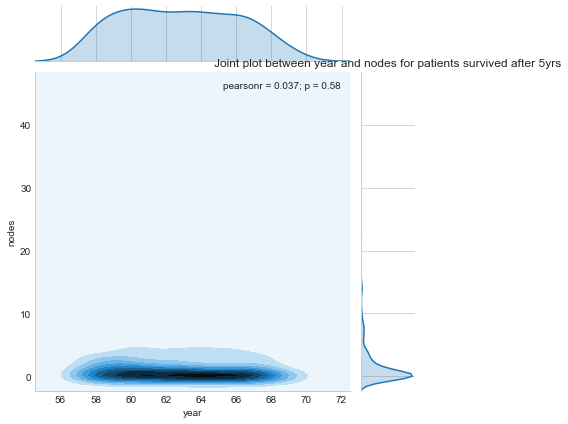

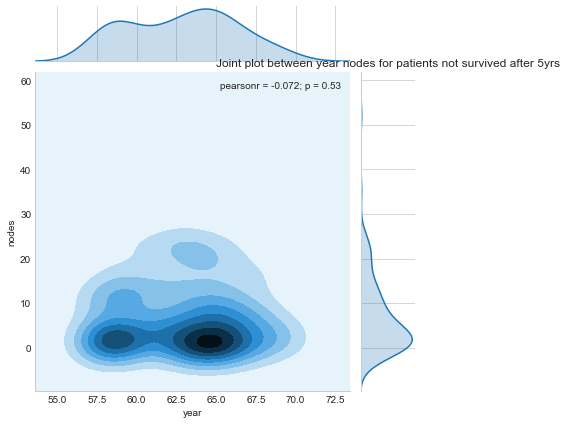

In [97]:
plt.figure(1)
sns.jointplot(x = "year", y = "nodes", data = haberman[haberman.status == "Survived after 5yrs"], kind = 'kde')
plt.title("Joint plot between year and nodes for patients survived after 5yrs")
plt.figure(2)
sns.jointplot(x = "year", y = "nodes", data = haberman[haberman.status == "Not Survived after 5yrs"], kind = 'kde')
plt.title("Joint plot between year nodes for patients not survived after 5yrs")
plt.show()

## Observations 

1. Most of the survived patients have undergone operation in the years between 1962 to 1966 and have no nodes
2. Most of the non survived patients have undergone operation in the years 1964 and 1965 and have nodes from 1 to 3.

## Joint plot between age and nodes 

<Figure size 432x288 with 0 Axes>

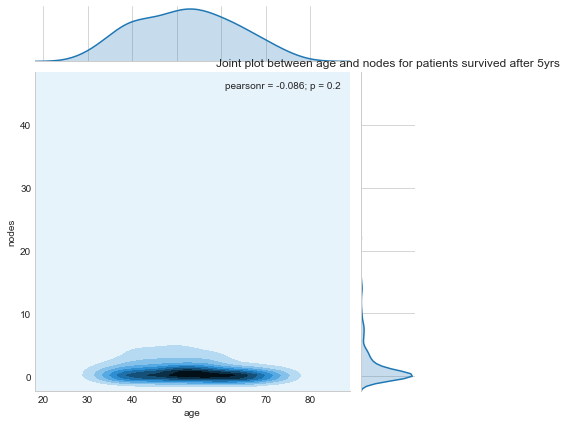

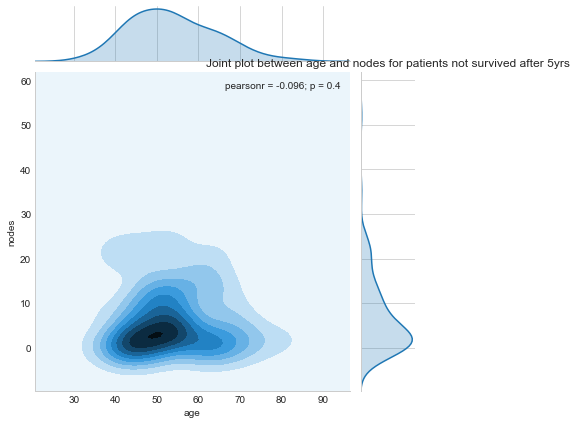

In [96]:
plt.figure(1)
sns.jointplot(x = "age", y = "nodes", data = haberman[haberman.status == "Survived after 5yrs"], kind = 'kde')
plt.title("Joint plot between age and nodes for patients survived after 5yrs")
plt.figure(2)
sns.jointplot(x = "age", y = "nodes", data = haberman[haberman.status == "Not Survived after 5yrs"], kind = 'kde')
plt.title("Joint plot between age and nodes for patients not survived after 5yrs")
plt.show()

## Observations 

1. Most of the survived patient's age is between 50 to 63 and they have 0 to 2 nodes.
2. Most of the non-survived patient's age is 50 and 51 and they have nodes 3 to 4, but since the circle is smaller, this will sum up to a very small set of observations.

<Figure size 432x288 with 0 Axes>

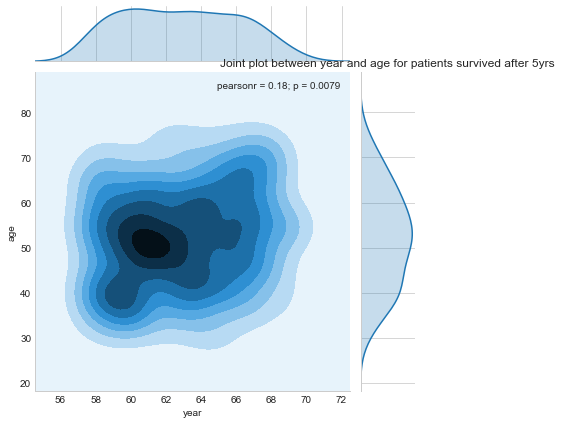

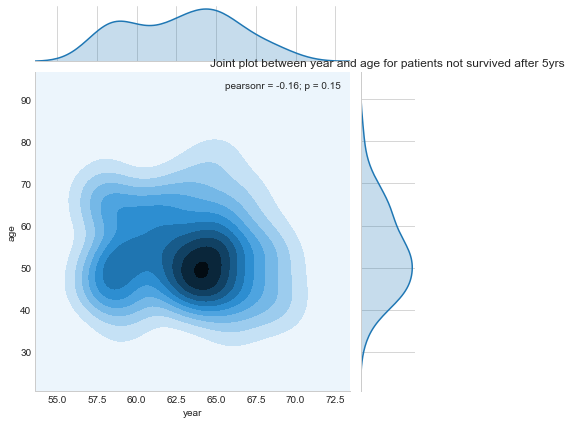

In [99]:
plt.figure(1)
sns.jointplot(x = "year", y = "age", data = haberman[haberman.status == "Survived after 5yrs"], kind = 'kde')
plt.title("Joint plot between year and age for patients survived after 5yrs")
plt.figure(2)
sns.jointplot(x = "year", y = "age", data = haberman[haberman.status == "Not Survived after 5yrs"], kind = 'kde')
plt.title("Joint plot between year and age for patients not survived after 5yrs")
plt.show()

## Observations 

1. With operation year 1960 to 1962 and age 48 to 53, there are more number of survived patients.
2. With operation year 1963 and 1964 and age 48 to 51, there are more number of non-survived patients, but since the circle is smaller, this will sum up to a very small set of observations.

# Conclusion 

1. It is not possible to classify all the observations with simple if else constructs or by drawing a line, because the data points of both the classes overlap each other massively. 


2. Yet, we can classify few of the data points ( 9 observations out of 306 observations) using simple if else construct. With respect to the given data set, we can predict the following:

    2.1 Patients with age less than 34 will survive more 5 years
    
    2.2 Patients with age more than 77 will not survive more than 5 years
    
    2.3 Patients with number of positive lymph nodes greater than 46 will not survive more than 5 years
    
    
3. For patients with age less than 50, we can predict the surivival probability will be quite higher by around 10%.


4. Although the number of positive lymph nodes of the patients will be widely spread between 0 to around 50, we can predict 75% of the patients will have number of positive lymph nodes less than 5, out of which around 81% of the patients will survive more than 5 years.


5. So we can predict around 60% of the patients, will have number of positive lymph nodes less than 5 and will survive more than 5 years. Hence the prediction is patients with positive lymph nodes less than 5, have around 60% of chance to survive more than 5 years.